# Wing Aerodynamics Analysis using Vortex-Step Method (VSM), Lift Line Theory (LLT), Vortex Lattice Method (VSM) and Computational Fluid Dynamics(CFD)
This notebook demonstrates the process of setting up and analyzing a wing's aerodynamics using VSM, LLT, VLM and CFD. We'll cover the following steps:
1. Setting up the environment and importing necessary libraries.
2. Process the data and store in processed_data
3. Run the solver, iteratively for multiple angles of attack
4. Store the results in results folder

## 1. Import necessary libraries
In this step, we import the necessary libraries for the aerodynamic analysis. We use:
- `numpy` for numerical operations.
- The `VSM` module for the aerodynamic modelling.
- The 'SurfplanAdapter' module to adapt SP files for the VSM module.

Make sure the `VSM` module is properly installed in your (virtual) environment, by running the cmd: `pip install -e .` from the root-directory of the `VSM` project.

Make sure the `SurfplanAdapter` module is properly installed in your (virtual) environment, by running the cmd: `pip install -e .` from the root-directory of the `SurfplanAdapter-main` project.

In [2]:
import numpy as np
import os
import logging
from pathlib import Path
import matplotlib.pyplot as plt
from SurfplanAdapter.surfplan_to_vsm.generate_vsm_input import (
    generate_VSM_input,
)
from SurfplanAdapter.logging_config import *
from VSM.Solver import Solver
import VSM.plotting as plotting


## 2. Process the data and store in processed_data

We create a `WingAerodynamics` object, from a `.txt` file, with the `generate_VSM_input` function through the following inputs : 
- `filepath` (str): the path to the kite 3D .txt extracted from Surfplan 
- `n_panels` (int): Number of panels to be used in the aerodynamic mesh
- `spanwise_panel_distribution` (str): Spanwise panel distribution type, sub-options:
    - `"linear"`: Linear distribution, even distribution
    - `"cosine"`: Cosine distribution, alots higher panel concetration near the tips and less mid-span
    - `"cosine_van_Garrel"`: Cosine distribution based on van Garrel method
    - `"split_provided"`: Keeps the original provided sections, and splits these evenly.
    - `"unchanged"`: Keep the original provided sections unchanged
- `is_save_geometry` (bool): choose to save or not the geometry in a .csv file
- `csv_file_path` (str): the file path where to save the .csv file

In [5]:
# Find the root directory of the repository
root_dir = os.path.abspath(os.getcwd())
while not os.path.isfile(os.path.join(root_dir, ".gitignore")):
    root_dir = os.path.abspath(os.path.join(root_dir, ".."))
    if root_dir == "/":
        raise FileNotFoundError("Could not find the root directory of the repository.")

# 1. Defining paths
# kite_origin = "TUDELFT_V3_LEI_KITE"
kite_origin = "BEYOND_THE_SEA"
kite_name = "SK50-VH_3d.txt"
filepath = Path(root_dir) / "data" / kite_origin / kite_name

# 2. Transforming the data into VSM input format
wing_aero = generate_VSM_input(
    filepath,
    n_panels=30,
    spanwise_panel_distribution="linear",
    is_save_geometry=True,
    csv_file_path=Path(root_dir)
    / "processed_data"
    / kite_origin
    / "geometry.csv",
)

row:[array([-1.04515 ,  5.901008,  2.384761]), array([1.4237  , 5.851627, 2.314091]), ['lei_airfoil_breukels', [np.float64(0.07000006514453012), 0.033969]]]
row:[array([-1.415966,  5.326193,  2.786413]), array([1.552476, 5.272114, 2.704118]), ['lei_airfoil_breukels', [np.float64(0.06516603335114891), 0.0499625]]]
row:[array([-1.854089,  4.729417,  3.154647]), array([1.666613, 4.689428, 3.085898]), ['lei_airfoil_breukels', [np.float64(0.06274988247387332), 0.0644905]]]
row:[array([-2.058241,  4.114273,  3.491296]), array([1.764703, 4.079645, 3.41909 ]), ['lei_airfoil_breukels', [np.float64(0.0609022589124995), 0.0685683]]]
row:[array([-2.220631,  3.466651,  3.760215]), array([1.847919, 3.448012, 3.706549]), ['lei_airfoil_breukels', [np.float64(0.059239902318004745), 0.0722338]]]
row:[array([-2.333633,  2.791767,  3.950649]), array([1.915278, 2.775106, 3.878379]), ['lei_airfoil_breukels', [np.float64(0.05742173333528964), 0.0752013]]]
row:[array([-2.40711 ,  2.101624,  4.074901]), array(

## 3. Run the solver, iteratively for multiple angles of attack

We set the `inflow conditions`, `plot` the wing, then solve the `aerodynamics`

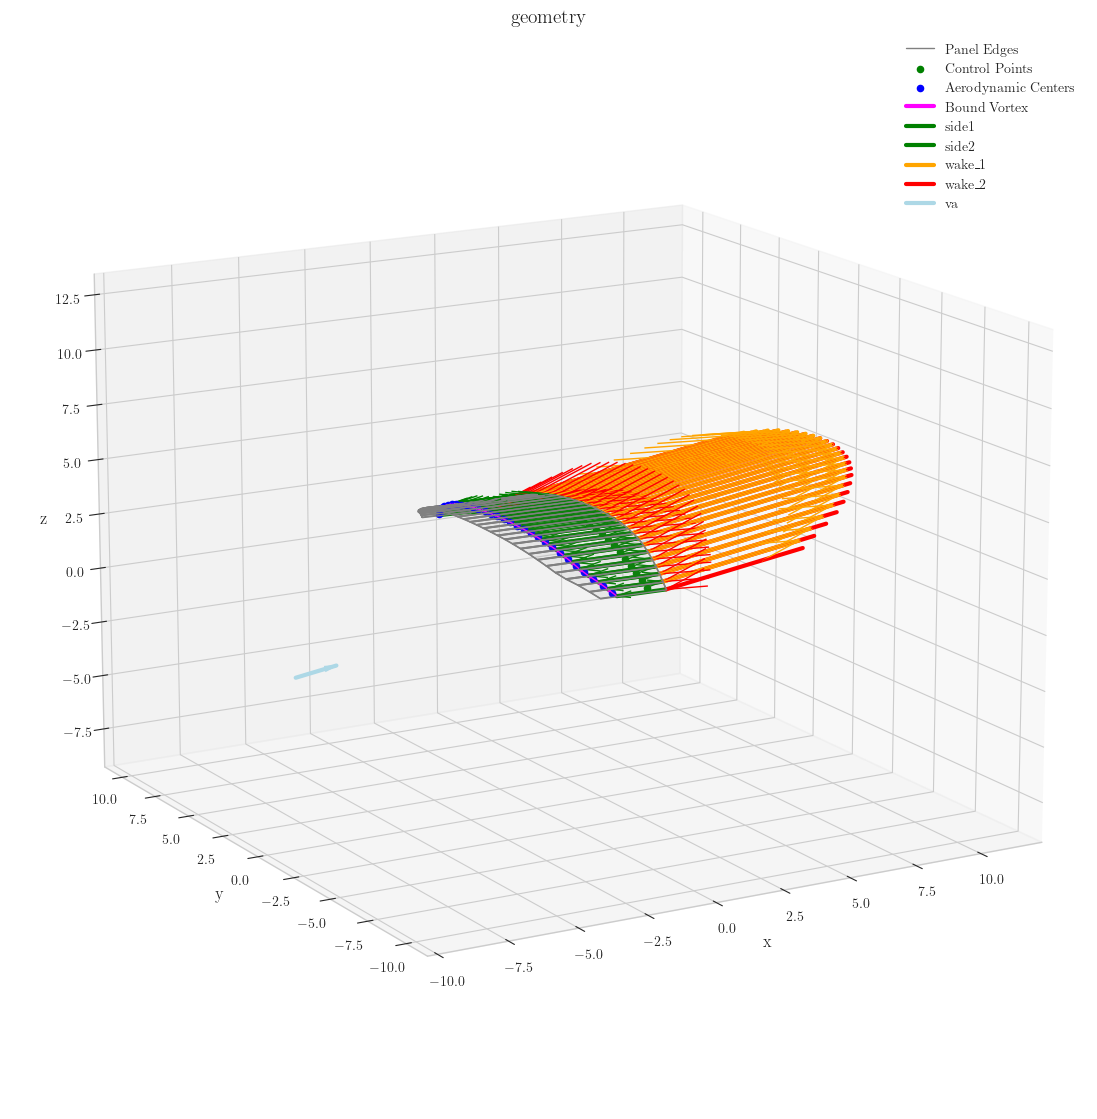

INFO:root:Converged after 367 iterations


In [6]:
# Set the flow conditions
aoa = np.deg2rad(10)
sideslip = 0
Umag = 20
wing_aero.va = (
    np.array([np.cos(aoa) * np.cos(sideslip), np.sin(sideslip), np.sin(aoa)]) * Umag,
    0,
)

# ### Plotting the wing
save_path = Path(root_dir) / "results" / "TUDELFT_V3_LEI_KITE" 
plotting.plot_geometry(
    wing_aero,
    title="geometry",
    data_type=".pdf",
    save_path=save_path,
    is_save=True,
    is_show=True,
)

### Solve the aerodynamics
# cl,cd,cs coefficients are flipped to "normal ref frame"
# x (+) downstream, y(+) left and z-up reference frame
solver = Solver(aerodynamic_model_type="VSM")
result = solver.solve(wing_aero)

## 4. Store the results in results folder

We `plot` the resulting `distributions` and `polars`

INFO:root:Converged after 344 iterations
INFO:root:Converged after 335 iterations
INFO:root:Converged after 330 iterations
INFO:root:Converged after 328 iterations
INFO:root:Converged after 326 iterations
INFO:root:Converged after 325 iterations
INFO:root:Converged after 325 iterations
INFO:root:Converged after 325 iterations
INFO:root:Converged after 326 iterations
INFO:root:Converged after 328 iterations
INFO:root:Converged after 330 iterations
INFO:root:Converged after 333 iterations
INFO:root:Converged after 337 iterations
INFO:root:Converged after 342 iterations
INFO:root:Converged after 347 iterations
INFO:root:Converged after 353 iterations
INFO:root:Converged after 361 iterations
INFO:root:Converged after 370 iterations
INFO:root:Converged after 381 iterations
INFO:root:Converged after 395 iterations


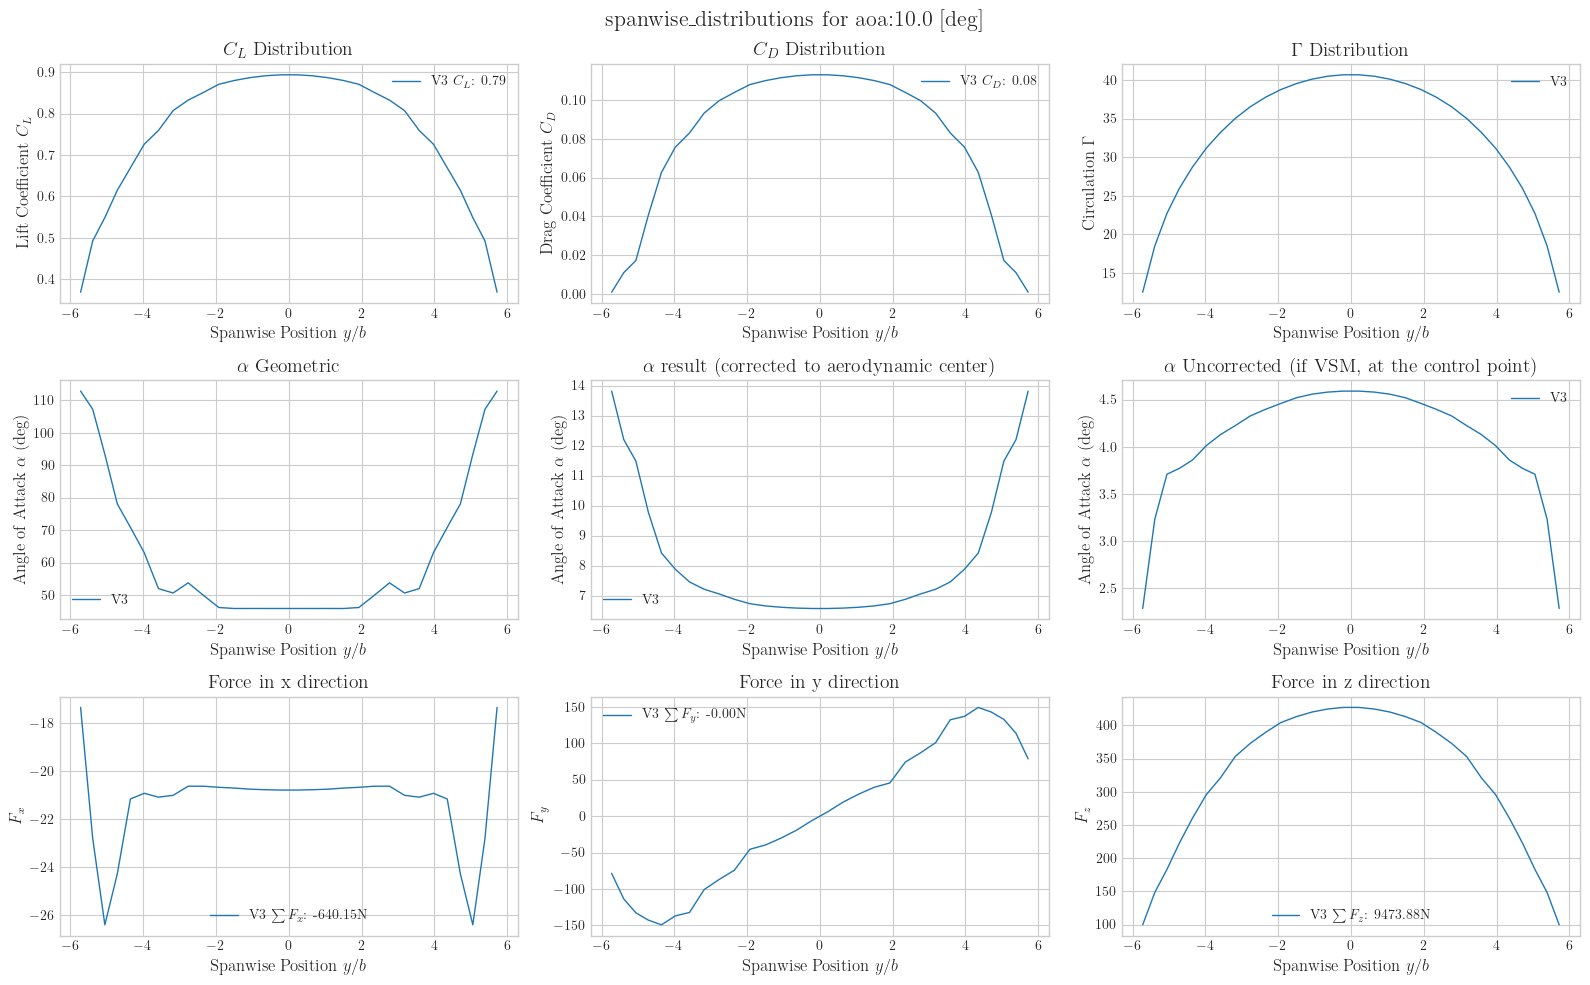

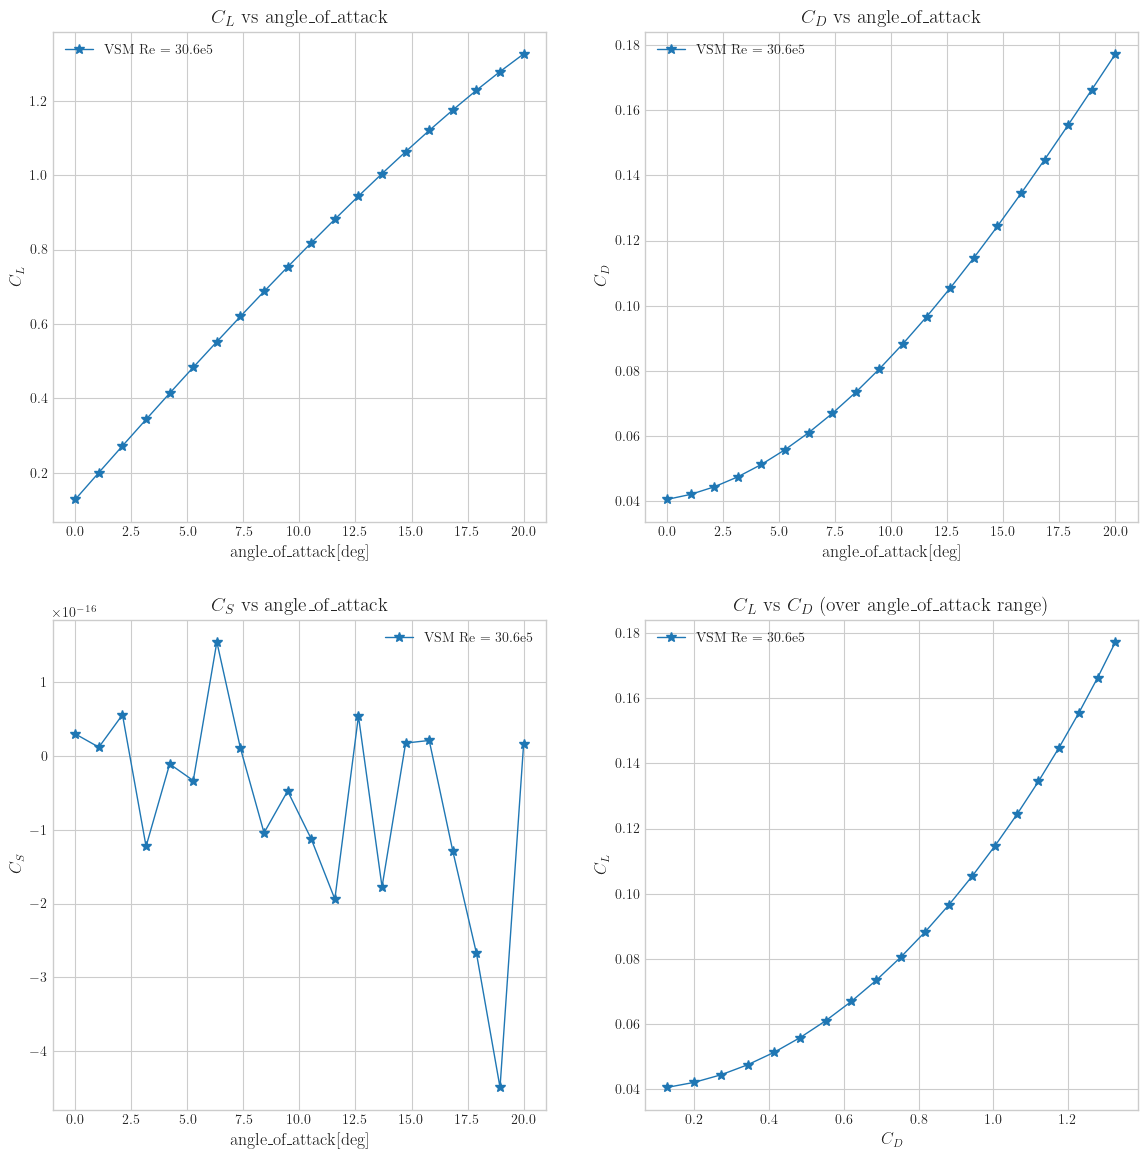

In [7]:
### plotting distributions
plotting.plot_distribution(
    y_coordinates_list=[[panel.aerodynamic_center[1] for panel in wing_aero.panels]],
    results_list=[result],
    label_list=["V3"],
    title=f"spanwise_distributions for aoa:{np.rad2deg(aoa):.1f} [deg]",
    data_type=".pdf",
    save_path=save_path,
    is_save=True,
    is_show=False,
)

### plotting polar
plotting.plot_polars(
    solver_list=[solver],
    wing_aero_list=[wing_aero],
    label_list=["VSM"],
    literature_path_list=[],
    angle_range=np.linspace(0, 20, 20),
    angle_type="angle_of_attack",
    angle_of_attack=0,
    side_slip=0,
    yaw_rate=0,
    Umag=10,
    title="rectangular_wing_polars",
    data_type=".pdf",
    save_path=save_path,
    is_save=True,
    is_show=False,
)


## II. VLM